In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as data
import yfinance as yf
from datetime import date
import tensorflow as tf

In [115]:
start = '2010-01-01'
end = date.today()

df = yf.download('BTC-INR', start, end)
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-21,5323292.0,5455964.0,5266708.5,5418612.5,5418612.5,1925646604696
2024-04-22,5418477.0,5479373.0,5358859.5,5413944.0,5413944.0,1709957900737
2024-04-23,5414693.5,5605943.5,5385019.0,5573610.5,5573610.5,2358500284076
2024-04-24,5573795.5,5600038.0,5488556.5,5531098.0,5531098.0,2024874430141
2024-04-25,5356783.0,5396338.0,5242757.0,5380197.5,5380197.5,2841283919872


In [116]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,28443.328125,28542.228516,27552.500000,27851.640625,27851.640625,1282359120
1,2014-09-18,27822.773438,27822.773438,25085.740234,25774.119141,25774.119141,2093992320
2,2014-09-19,25753.654297,25988.835938,23366.087891,24023.335938,24023.335938,2307413745
3,2014-09-20,24015.851562,25757.560547,23724.380859,24881.808594,24881.808594,2243150060
4,2014-09-21,24831.972656,25096.121094,23925.064453,24268.257812,24268.257812,1617399085


In [117]:
df = df.drop(["Adj Close"], axis = 1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2014-09-17,28443.328125,28542.228516,27552.500000,27851.640625,1282359120
1,2014-09-18,27822.773438,27822.773438,25085.740234,25774.119141,2093992320
2,2014-09-19,25753.654297,25988.835938,23366.087891,24023.335938,2307413745
3,2014-09-20,24015.851562,25757.560547,23724.380859,24881.808594,2243150060
4,2014-09-21,24831.972656,25096.121094,23925.064453,24268.257812,1617399085


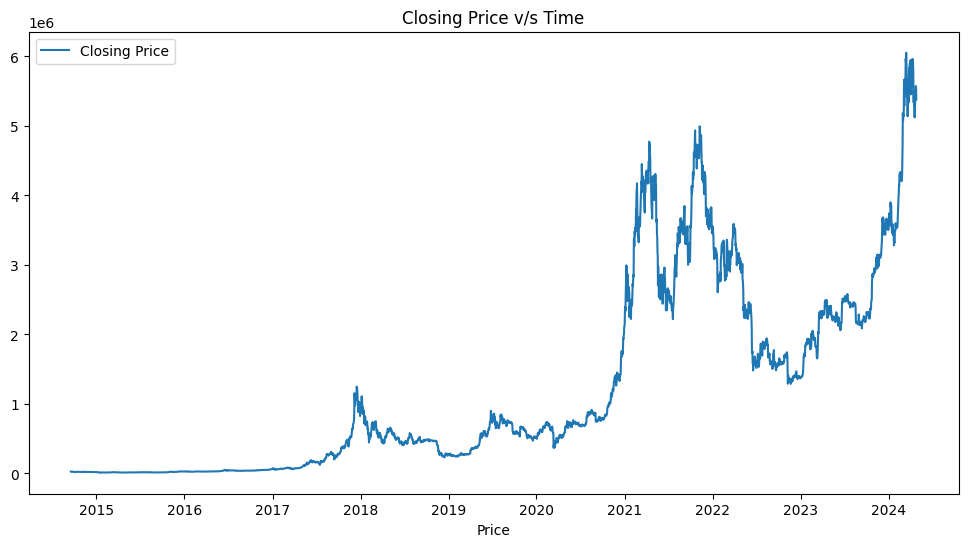

In [118]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close, label="Closing Price")
plt.title("Closing Price v/s Time")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

In [119]:
df

,Date,Open,High,Low,Close,Volume
0,2014-09-17,2.844333e+04,2.854223e+04,2.755250e+04,2.785164e+04,1282359120
1,2014-09-18,2.782277e+04,2.782277e+04,2.508574e+04,2.577412e+04,2093992320
2,2014-09-19,2.575365e+04,2.598884e+04,2.336609e+04,2.402334e+04,2307413745
3,2014-09-20,2.401585e+04,2.575756e+04,2.372438e+04,2.488181e+04,2243150060
4,2014-09-21,2.483197e+04,2.509612e+04,2.392506e+04,2.426826e+04,1617399085
...,...,...,...,...,...,...
3504,2024-04-21,5.323292e+06,5.455964e+06,5.266708e+06,5.418612e+06,1925646604696
3505,2024-04-22,5.418477e+06,5.479373e+06,5.358860e+06,5.413944e+06,1709957900737
3506,2024-04-23,5.414694e+06,5.605944e+06,5.385019e+06,5.573610e+06,2358500284076
3507,2024-04-24,5.573796e+06,5.600038e+06,5.488556e+06,5.531098e+06,2024874430141


In [120]:
# TAking a 100 day moving average.
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3504    4.751502e+06
3505    4.770125e+06
3506    4.790354e+06
3507    4.811026e+06
3508    4.829603e+06
Name: Close, Length: 3509, dtype: float64

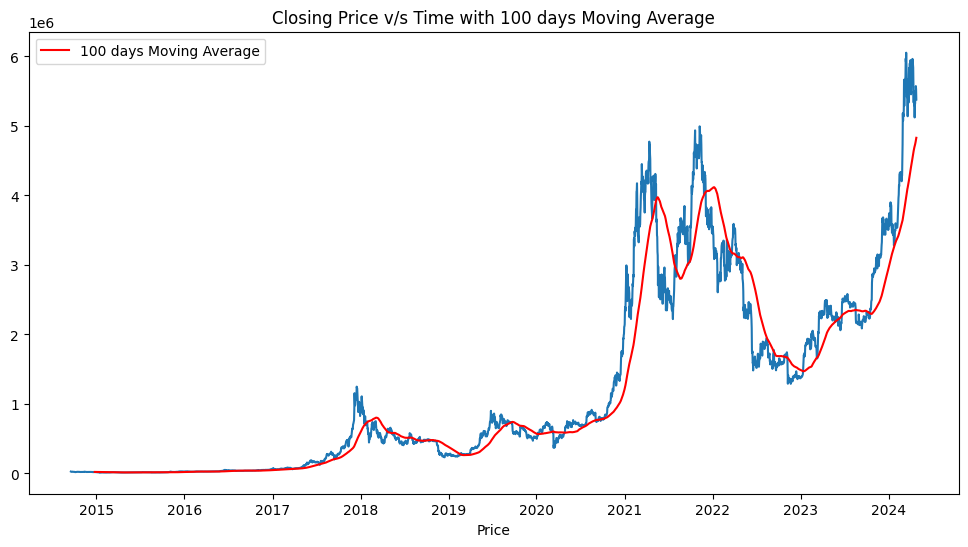

In [121]:
plt.figure(figsize = (12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma100, color="r", label="100 days Moving Average")
plt.title("Closing Price v/s Time with 100 days Moving Average")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

In [122]:
#Taking a 200 days moving Average
ma200 = df.Close.rolling(200).mean()
ma200

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
3504    3.936740e+06
3505    3.952237e+06
3506    3.968697e+06
3507    3.984740e+06
3508    4.000017e+06
Name: Close, Length: 3509, dtype: float64

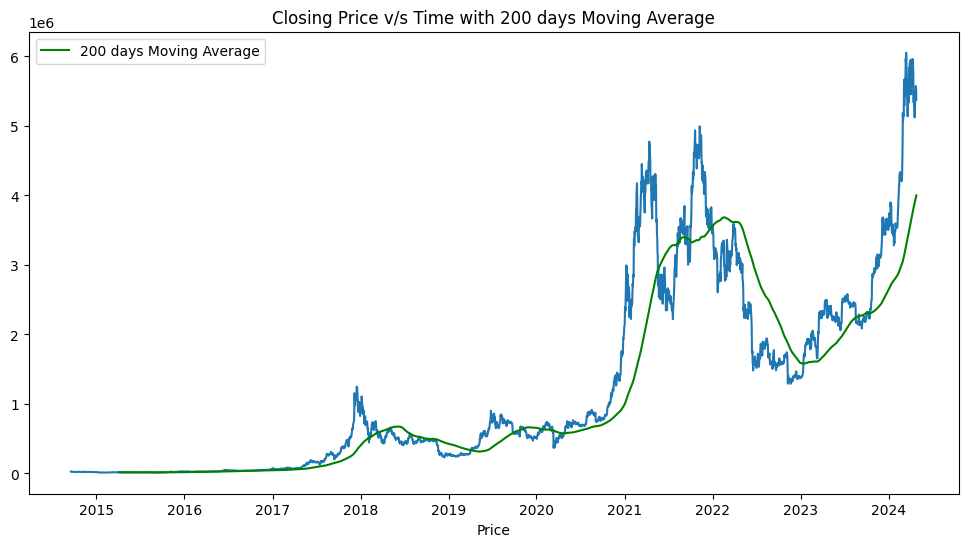

In [123]:
plt.figure(figsize = (12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma200, color="g", label="200 days Moving Average")
plt.title("Closing Price v/s Time with 200 days Moving Average")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

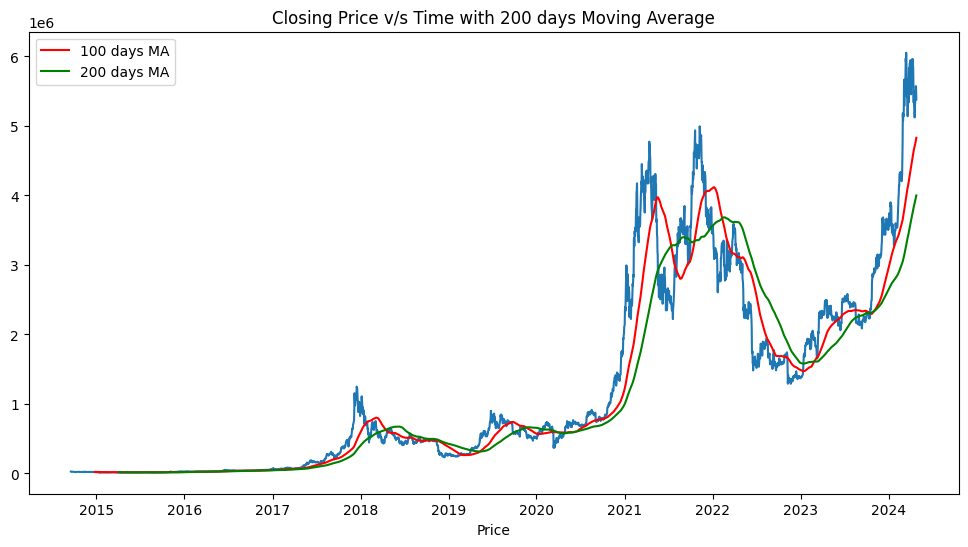

In [124]:
plt.figure(figsize = (12,6))
plt.plot(df.Date, df.Close)
plt.plot(df.Date, ma100, color="r", label="100 days MA")
plt.plot(df.Date, ma200, color="g", label="200 days MA")

plt.title("Closing Price v/s Time with 200 days Moving Average")
plt.xlabel("Time")
plt.xlabel("Price")
plt.legend()

In [149]:
dataset_train = df
x = dataset_train.iloc[:,1:2].values

In [126]:
train_size = 0.8
split_index = int(len(x) * train_size)
train_data = x[:split_index]
test_data = x[split_index:]

In [127]:
train_data

array([[  28443.328125  ],
       [  27822.7734375 ],
       [  25753.65429688],
       ...,
       [2290393.75      ],
       [2358636.25      ],
       [2256124.25      ]])

In [128]:
test_data

array([[2297496.75 ],
       [2291165.25 ],
       [2270779.5  ],
       [2240806.5  ],
       [2254617.25 ],
       [2287521.   ],
       [2460301.5  ],
       [2467078.5  ],
       [2311590.   ],
       [2357595.75 ],
       [2308000.75 ],
       [2317991.75 ],
       [2323863.25 ],
       [2441388.25 ],
       [2419560.25 ],
       [2348511.25 ],
       [2343154.25 ],
       [2273775.25 ],
       [2218150.5  ],
       [2090286.125],
       [1757680.125],
       [1731028.625],
       [1758703.25 ],
       [1589636.375],
       [1596141.   ],
       [1482120.375],
       [1602374.625],
       [1605000.875],
       [1618914.5  ],
       [1562818.75 ],
       [1647609.25 ],
       [1661583.   ],
       [1682154.5  ],
       [1645513.   ],
       [1626208.25 ],
       [1603702.   ],
       [1586515.625],
       [1565088.75 ],
       [1521765.625],
       [1519180.75 ],
       [1523541.375],
       [1596584.25 ],
       [1602817.625],
       [1624141.625],
       [1714135.5  ],
       [17

In [129]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_data_scaled = sc.fit_transform(train_data)
test_data_scaled = sc.transform(test_data)

In [130]:
# Creatung a data structue with 100 timesteps and 1 output

x_train = []
y_train = []
for i in range(100,len(train_data)):
    x_train.append(train_data_scaled[i-100:i,0])
    y_train.append(train_data_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [131]:
# Reshapping
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [132]:
# Building the RNN

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

rnn = Sequential()

rnn.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1))) # 1st LSTM Layers 
rnn.add(Dropout(0.2)) # 1st Dropout Layers

rnn.add(LSTM(units=50,return_sequences=True)) # 2nd LSTM Layers 
rnn.add(Dropout(0.2)) # 2nd Dropout Layers

rnn.add(LSTM(units=50,return_sequences=True)) # 3rd LSTM Layers 
rnn.add(Dropout(0.2)) # 3rd Dropout Layers

rnn.add(LSTM(units=50)) # 4th LSTM Layers 
rnn.add(Dropout(0.2)) # 4th Dropout Layers

# Output Layer
rnn.add(Dense(units=1))

In [133]:
# Compiling the RNN
rnn.compile(optimizer="adam", loss="mean_squared_error")

In [134]:
# Training the RNN Model
rnn.fit(x_train,y_train,epochs=100,batch_size=32, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)])

Epoch 1/100
85/85 [==============================] - 49s 234ms/step - loss: 0.0097
Epoch 2/100
85/85 [==============================] - 14s 170ms/step - loss: 0.0028
Epoch 3/100
85/85 [==============================] - 11s 129ms/step - loss: 0.0026
Epoch 4/100
85/85 [==============================] - 11s 125ms/step - loss: 0.0021
Epoch 5/100
85/85 [==============================] - 12s 136ms/step - loss: 0.0022
Epoch 6/100
85/85 [==============================] - 13s 150ms/step - loss: 0.0021
Epoch 7/100
85/85 [==============================] - 13s 153ms/step - loss: 0.0019
Epoch 8/100
85/85 [==============================] - 13s 151ms/step - loss: 0.0017
Epoch 9/100
85/85 [==============================] - 14s 167ms/step - loss: 0.0018
Epoch 10/100
85/85 [==============================] - 16s 188ms/step - loss: 0.0016
Epoch 11/100
85/85 [==============================] - 15s 180ms/step - loss: 0.0017
Epoch 12/100
85/85 [==============================] - 13s 156ms/step - loss: 0.0015
E

In [135]:
# Making the Predictions and Visualisation

inputs = x[len(train_data)-100:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(100,len(test_data)+100):
    x_test.append(inputs[i-100:i,0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

y_pred = rnn.predict(x_test)
y_pred = sc.inverse_transform(y_pred)
y_pred

22/22 [==============================] - 4s 71ms/step


array([[2448397.2],
       [2441439.5],
       [2435198.8],
       [2426658. ],
       [2411591.8],
       [2397048. ],
       [2393280.2],
       [2432530. ],
       [2498395. ],
       [2529037.2],
       [2530634.5],
       [2508879. ],
       [2481147.5],
       [2459708.5],
       [2471089.5],
       [2500695. ],
       [2516319. ],
       [2513470. ],
       [2487372.8],
       [2441862. ],
       [2371186.5],
       [2240781.5],
       [2086209.1],
       [1952870.1],
       [1838205.6],
       [1750216.8],
       [1677463.2],
       [1638333. ],
       [1633562.4],
       [1653309.8],
       [1674026.2],
       [1698911.6],
       [1727136.8],
       [1755979.8],
       [1773833.4],
       [1775453.2],
       [1761779.8],
       [1737930.8],
       [1708801.8],
       [1674718.1],
       [1641372.1],
       [1615129. ],
       [1609418.4],
       [1622397.1],
       [1647325.1],
       [1688366.9],
       [1736530.9],
       [1777218.5],
       [1793791.1],
       [1778529.2],


In [136]:
y_true = test_data
y_true

array([[2297496.75 ],
       [2291165.25 ],
       [2270779.5  ],
       [2240806.5  ],
       [2254617.25 ],
       [2287521.   ],
       [2460301.5  ],
       [2467078.5  ],
       [2311590.   ],
       [2357595.75 ],
       [2308000.75 ],
       [2317991.75 ],
       [2323863.25 ],
       [2441388.25 ],
       [2419560.25 ],
       [2348511.25 ],
       [2343154.25 ],
       [2273775.25 ],
       [2218150.5  ],
       [2090286.125],
       [1757680.125],
       [1731028.625],
       [1758703.25 ],
       [1589636.375],
       [1596141.   ],
       [1482120.375],
       [1602374.625],
       [1605000.875],
       [1618914.5  ],
       [1562818.75 ],
       [1647609.25 ],
       [1661583.   ],
       [1682154.5  ],
       [1645513.   ],
       [1626208.25 ],
       [1603702.   ],
       [1586515.625],
       [1565088.75 ],
       [1521765.625],
       [1519180.75 ],
       [1523541.375],
       [1596584.25 ],
       [1602817.625],
       [1624141.625],
       [1714135.5  ],
       [17

In [137]:
date = dataset_train["Date"]
x_axis = date.iloc[len(train_data):]

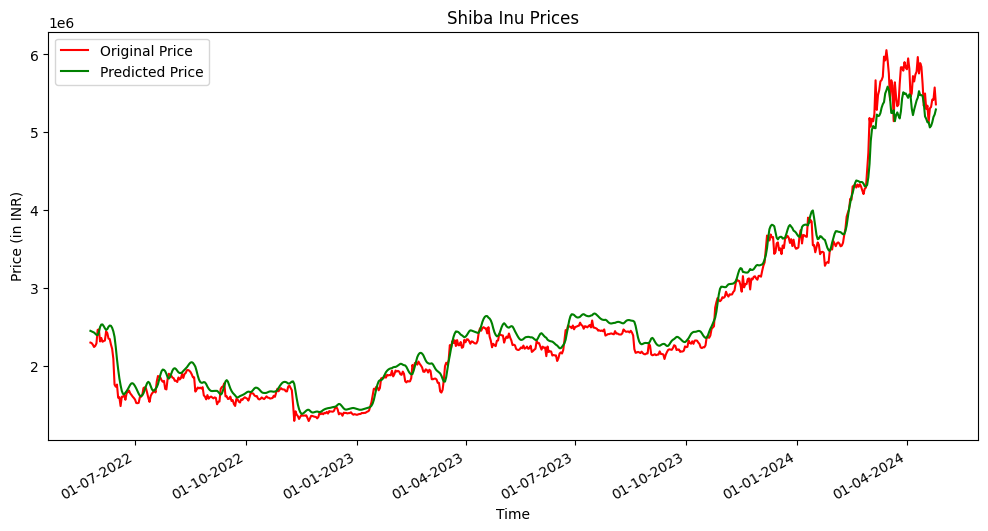

In [138]:
from matplotlib.dates import DateFormatter

plt.figure(figsize = (12,6))

# Set the date format for the x-axis
date_format = DateFormatter("%d-%m-%Y")  # Adjust the format as needed
plt.gca().xaxis.set_major_formatter(date_format)

# Rotate the dates to prevent overlapping
plt.gcf().autofmt_xdate()

plt.plot(x_axis, y_true, color="red", label="Original Price")
plt.plot(x_axis, y_pred, color="green", label="Predicted Price")

plt.xlabel("Time")
plt.ylabel("Price (in INR)")
plt.title("Shiba Inu Prices")
plt.legend()
plt.show()

In [139]:
# Code Snippet for logic
# x_new_test = x[len(x)-100:len(x),0]
# # x_new_test.shape
# x_new_test = sc.transform(x_new_test.reshape(-1,1))
# x_new_test = x_new_test.reshape(1,100)
# # Reshaping
# x_new_test = np.reshape(x_new_test, (x_new_test.shape[0],x_new_test.shape[1],1))

# y_new_pred = rnn.predict(x_new_test)
# y_new_pred = sc.inverse_transform(y_new_pred)
# y_new_pred

In [140]:
x_bin = x

for i in range(0,60):
    x_new_test = x_bin[len(x)-100+i:len(x)+i]
    x_new_test = sc.transform(x_new_test.reshape(-1,1))
    x_new_test = x_new_test.reshape(1,100)
    # Reshaping
    x_new_test = np.reshape(x_new_test, (x_new_test.shape[0],x_new_test.shape[1],1))
    y_new_pred = rnn.predict(x_new_test)
    y_new_pred = sc.inverse_transform(y_new_pred)
    
    x_bin = np.append(x_bin, y_new_pred)

1/1 [==============================] - 0s 54ms/step


In [141]:
x_bin[len(x):].shape

(60,)

In [142]:
new_data = x_bin[len(x):]
new_data

array([5237114.5, 5131997.5, 5027578.5, 4939185. , 4870244. , 4819519. ,
       4784020. , 4760202. , 4744664.5, 4734531.5, 4727592.5, 4722299.5,
       4717668.5, 4713140.5, 4708460.5, 4703563. , 4698490. , 4693335.5,
       4688204. , 4683199.5, 4678411.5, 4673914. , 4669762.5, 4665999.5,
       4662652. , 4659734.5, 4657249. , 4655186. , 4653523. , 4652232.5,
       4651276.5, 4650614.5, 4650199.5, 4649986.5, 4649931.5, 4649992. ,
       4650131.5, 4650316.5, 4650522.5, 4650726.5, 4650916. , 4651080. ,
       4651214. , 4651316. , 4651388.5, 4651433. , 4651455.5, 4651462.5,
       4651457. , 4651445.5, 4651431.5, 4651419. , 4651411. , 4651407.5,
       4651411.5, 4651422. , 4651438.5, 4651461. , 4651487. , 4651515.5])

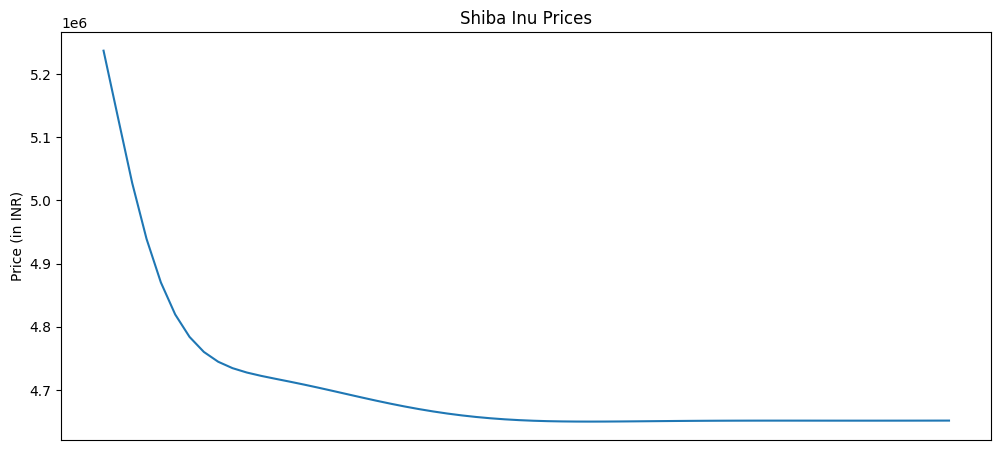

In [143]:
from matplotlib.dates import DateFormatter

plt.figure(figsize = (12,6))

# Set the date format for the x-axis
dates_format = DateFormatter("%d-%m-%Y")  # Adjust the format as needed
plt.gca().xaxis.set_major_formatter(dates_format)
plt.gca().get_xaxis().set_visible(False)
# Rotate the dates to prevent overlapping
plt.gcf().autofmt_xdate()

plt.plot(new_data)

plt.xlabel("Time")
plt.ylabel("Price (in INR)")
plt.title("Shiba Inu Prices")
plt.show()

In [144]:
y_pred.shape

(702, 1)

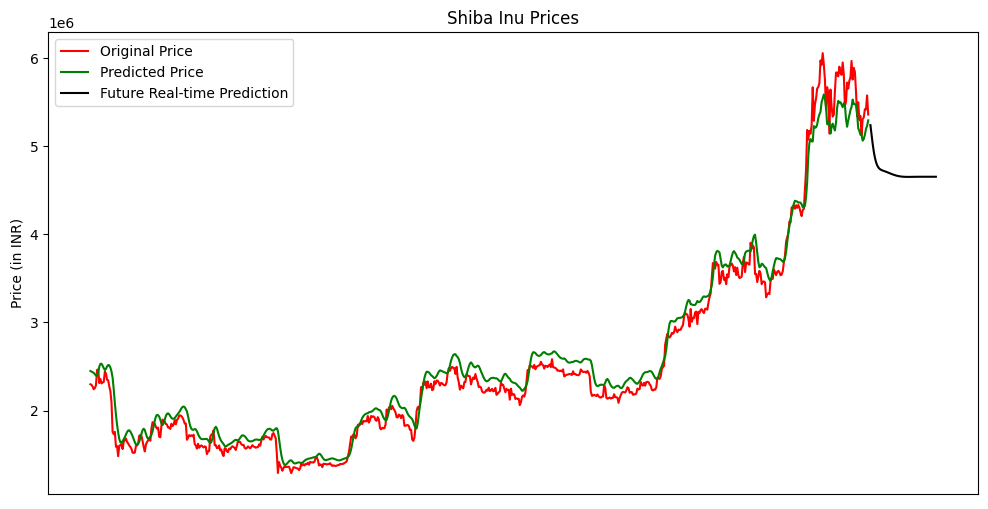

In [145]:
from matplotlib.dates import DateFormatter

plt.figure(figsize = (12,6))

x_bin_axis = x_axis

plt.plot(y_true, color="red", label="Original Price")
plt.plot(y_pred, color="green", label="Predicted Price")
plt.gca().get_xaxis().set_visible(False)

new_x_axis_ultimate = []
for i in range(1,61):   
    new_x_axis_ultimate = np.append(new_x_axis_ultimate,len(y_true)+i)
    
plt.plot(new_x_axis_ultimate,new_data,color="black", label="Future Real-time Prediction")

plt.xlabel("Time")
plt.ylabel("Price (in INR)")
plt.title("Shiba Inu Prices")
plt.legend()
plt.show()

In [147]:
rnn.save("cryptocurrency_future_price_prediction")

INFO:tensorflow:Assets written to: cryptocurrency_future_price_prediction\assets


INFO:tensorflow:Assets written to: cryptocurrency_future_price_prediction\assets
